# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [18]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

<IPython.core.display.Javascript object>


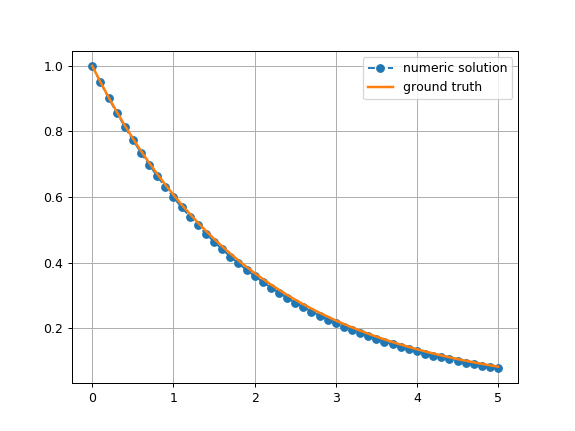

In [38]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

<IPython.core.display.Javascript object>


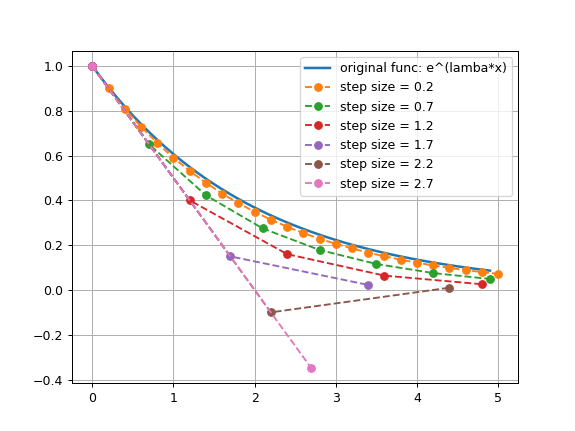

In [39]:
# ... ENTER YOUR CODE HERE ...
lam = -0.5
u0 = 1.0
T = 5
dt = 0.2
s = np.arange(0,5,0.1)
plt.plot(s, np.exp(lam*s), '-', lw=2, label='original func: e^(lamba*x)')

start = 1e-3
end = 3
for i in np.arange(start,end,0.5):
    tt, y = euler_solve(lam, u0, T, dt)
    plt.plot(tt, y, 'o--', label='step size = '+str(round(dt,2)))
    dt+=0.5
plt.legend(loc='best')
plt.grid(True)

NOTE: It can be observed above that as the step size decreases the accuracy increases.

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

In [40]:
# ... ENTER YOUR CODE AND DISCUSSION HERE ...
def euler_solve_imp(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an implicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] / (1 - dt * lam)
    return tt, y

<IPython.core.display.Javascript object>


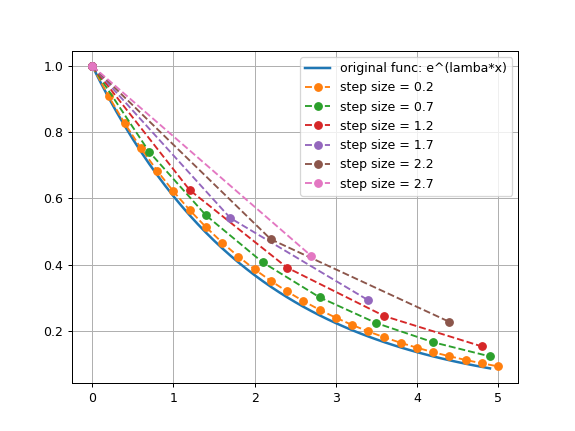

In [41]:
lam = -0.5
u0 = 1.0
T = 5
dt = 0.2
s = np.arange(0,5,0.1)
plt.plot(s, np.exp(lam*s), '-', lw=2, label='original func: e^(lamba*x)')
start = 1e-3
end = 3

for i in np.arange(start,end,0.5):
    tt, y = euler_solve_imp(lam, u0, T, dt)
    plt.plot(tt, y, 'o--', label='step size = '+str(round(dt,2)))
    dt+=0.5
plt.legend(loc='best')
plt.grid(True)

NOTE: Both implicit and explicit schemes show higher accuracy in smaller timesteps. It can be observed from the graphs, that the explicit euler scheme approximates the solution under the curve, while the implicit euler scheme approximates the solution above the curve.

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [42]:
# ... ENTER YOUR CODE HERE ...
def euler_solve_sys(lam, u0, T, dt):
    
    n = lam.shape[0]
    num_steps = int(T/dt)
    
    tt = np.arange(num_steps+1)*dt
    
    y = np.empty((num_steps+1, n))
    
    y[0, :] = u0
    for i in range(num_steps):
        y[i+1,:] = y[i,:] + dt*(lam @ y[i, :])

    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

<IPython.core.display.Javascript object>


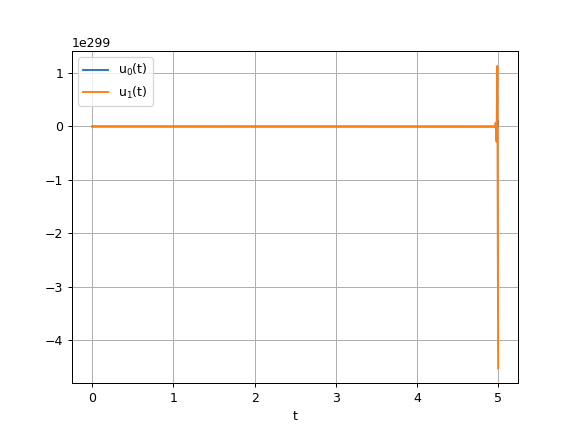

In [43]:
# ... ENTER YOUR CODE HERE ...
A = np.array([[-10, 10], [32, -499]])
u0 = np.array([1, 0])
T = 5
dt = 0.01

tt, y = euler_solve_sys(A, u0, T, dt)
n = y.shape[1]



for i in range(n):
    plt.plot(tt, y[:, i], label="$\mathregular{u_%s(t)}$" % i)

plt.xlabel("t")
plt.legend()
plt.grid()

In [44]:
eigval = np.linalg.eigvals(A)
eigval

array([  -9.34647667, -499.65352333])

In [45]:
s = max(np.abs(eigval)) / min(np.abs(eigval))
print(s, "\n")
print("")

53.45902427704808 




NOTE: The stiffness ratio is s>>1. Therefore, eulers explicit method is not stable, and should not be used in this case.

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [46]:
# ... ENTER YOUR CODE HERE ...
def euler_solve_sys_imp(lam, u0, T, dt):
    
    n = lam.shape[0]
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    
    y = np.empty((num_steps+1, n))
    
    y[0, :] = u0
    
    for i in range(num_steps):
        y[i+1,:] = np.linalg.solve((np.eye(n)-dt*lam), y[i, :])

        
    return tt, y

<IPython.core.display.Javascript object>


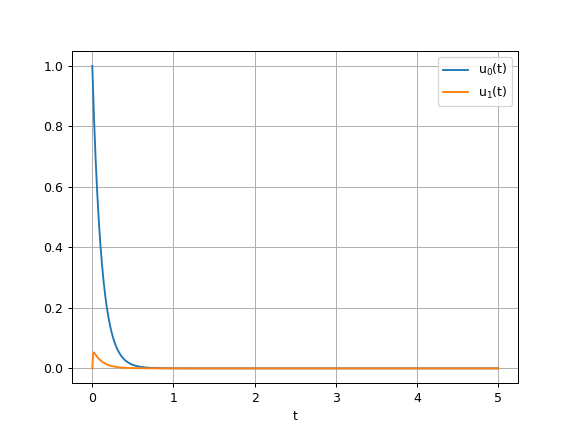

In [47]:
tt, y = euler_solve_sys_imp(A, u0, T, dt)
n = y.shape[1]


for i in range(n):
    plt.plot(tt, y[:, i], label="$\mathregular{u_%s(t)}$" % i)

plt.xlabel("t")
plt.legend()
plt.grid()

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

<IPython.core.display.Javascript object>


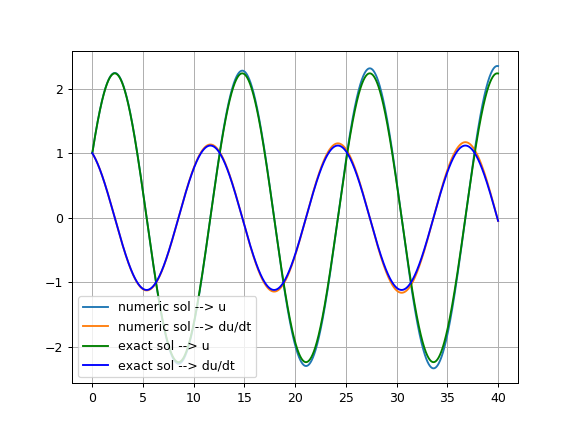

In [48]:
# ... ENTER YOUR CODE HERE ...

def euler_solve_sec(omega, u0,x0,T, dt):

    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    x = np.empty(num_steps+1)
    y[0] = u0
    x[0] = x0
    x[1] = x[0]-dt*omega*omega*y[0]
    
    for k in range(num_steps):
        x[k+1] = x[k]-dt*omega*omega*y[k]
        y[k+1] = dt*x[k] + (x[k]-x[k+1])/(dt*omega*omega)
    return tt, x, y

def energy_sum(omega,u,du):
#sums up (du/dt)^2/2 and (omega*u)^2/2, which is the energy
    m = np.size(u)
    sum_ener = np.empty(m)
    for i in range(0,m):
        sum_ener[i] = du[i]*du[i]/2.0 + omega*omega*u[i]*u[i]/2.0
    return sum_ener



omega = 0.5
#functions that are numerically generated are compared to their exact solutions
tt, x, y = euler_solve_sec(omega, u0=1.0, x0 = 1.0, T=40, dt=0.01)

plt.plot(tt, y, label='numeric sol --> u')
plt.plot(tt, x, label='numeric sol --> du/dt')

plt.plot(tt,np.cos(0.5*tt)+2*np.sin(0.5*tt),'g-',label='exact sol --> u')
plt.plot(tt,-0.5*np.sin(0.5*tt)+np.cos(0.5*tt),'b-', label='exact sol --> du/dt')
plt.legend(loc='best')
plt.grid(True)

<IPython.core.display.Javascript object>


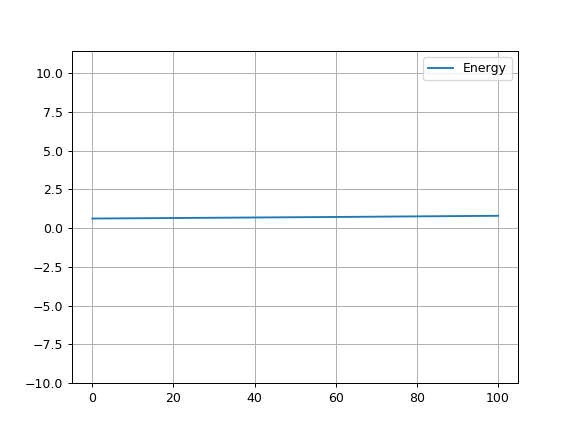

In [49]:
tt, x, y = euler_solve_sec(omega, u0=1.0, x0 = 1.0, T=100, dt=0.01)
#the values are added
energy = energy_sum(omega,y,x)
plt.margins(y=60)
plt.plot(tt,energy,label='Energy')
plt.legend(loc='best')
plt.grid(True)

NOTE: As observed from above two graphs, energy is conserved when the time step is small, however, as the time step increases it generates poorer results.

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [50]:
# ... ENTER YOUR CODE HERE ...

def rk_2(omega, u0=1.0, x0 = 1.0, T=100, dt=0.0):
#x1/2 - x[k] = -dt*omega^2*y[k]
#y1/2 - y[k] = dt*0.5*x[k]
#x[k+1] - x[k] = -dt*omega*omega*y1/2
#y[k+1] - y[k] = dt*xhalf
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    x = np.empty(num_steps+1)
    y[0] = u0
    x[0] = x0
    for k in range(num_steps):
        xhalf = x[k]-dt*omega*omega*0.5*y[k]
        yhalf = y[k]+dt*0.5*x[k]
        x[k+1] = x[k]-dt*omega*omega*yhalf
        y[k+1] = dt*xhalf+y[k]
    return tt, x, y
    

<IPython.core.display.Javascript object>


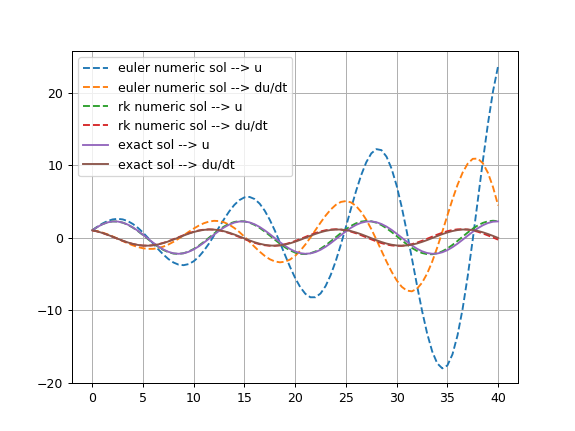

In [51]:
tt, x, y = rk_2(omega, u0=1.0, x0 = 1.0, T=40, dt=0.5)
tt1, x1, y1 = euler_solve_sec(omega, u0=1.0, x0 = 1.0, T=40, dt=0.5)


plt.plot(tt1, y1, '--', label='euler numeric sol --> u')
plt.plot(tt1, x1, '--', label='euler numeric sol --> du/dt')

plt.plot(tt, y, '--', label='rk numeric sol --> u')
plt.plot(tt, x, '--', label='rk numeric sol --> du/dt')

plt.plot(tt,np.cos(0.5*tt)+2*np.sin(0.5*tt),label='exact sol --> u')
plt.plot(tt,-0.5*np.sin(0.5*tt)+np.cos(0.5*tt),label='exact sol --> du/dt')
plt.legend(loc='best')
plt.grid(True)

NOTE: The 2nd order Runge-Kutta method gave much more accurate results due to the better approximation order. Runge-Kutta method stays with the exact solutions while euler's method blew up due to the large step size.

The approximation order of Runge-Kutta method is quadratic while explicit eulers method's approximation order is linear.